# Visulation of Central Limit Theory (CLT)

- Writer: Liyang FANG, Zihang WANG
- Environment:
  * python3
  * pandas
  * matplotlib
  * seaborn

## Background
The Central Limit Theorem (CLT) states that as the sample size rises, the distribution of sample means converges to a normal distribution. Additionally, the sample means themselves also converge to the population means, independent of the form of the population distribution. It serves as an effective instrument for forecasting the attributes of a population.

## Intro
This project aims to visualize and test the CLT, we will use a dataset including the movie ratings from IMDB.

The dataset is downloaded from [Kaggle](https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores).

In [1]:
# Environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movieSet = pd.read_csv('DataSet/Movies.csv')
movieSet.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [3]:
imdb_score = movieSet['imdb_score']
imdb_score.describe()

count    5283.000000
mean        6.533447
std         1.160932
min         1.500000
25%         5.800000
50%         6.600000
75%         7.400000
max         9.600000
Name: imdb_score, dtype: float64

## Method

###  The distribution of population

/Users/ericwindsor/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ericwindsor/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


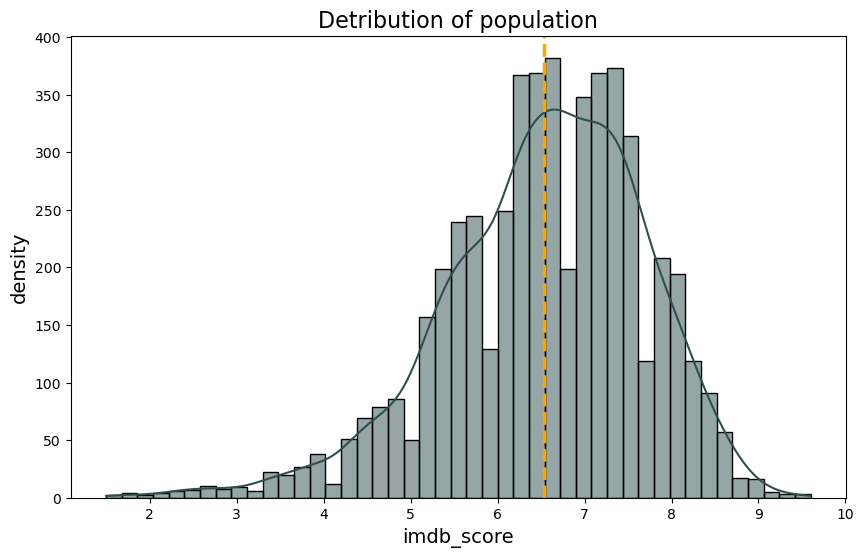

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(imdb_score,color="darkslategrey",kde=True)
plt.axvline(x=np.mean(imdb_score), linestyle='--',
            linewidth=2.5, label="sample mean of $n=25$", c='orange')
plt.xlabel('imdb_score',fontsize=14)
plt.ylabel('density',fontsize=14)
plt.title('Detribution of population', fontsize = 16)
plt.show()

Based on the graph, the distribution of IMDB ratings in the population seems to closely resemble a normal distribution but actually not because of its asymmetricality.

In [5]:
# Create the sample mean list according to the sample size and counts of sampling
def calc_sample_mean(sample_size, count):
    meanlist = []
    for i in range(count):
        sample_mean = imdb_score.sample(n=sample_size).mean()
        meanlist.append(sample_mean)
    return meanlist

In [6]:
# Calculate the standard error
def calc_sample_standard_error(sample, sample_size):
    return np.std(sample)/sample_size

### The distribution of samples with different sizes

In [7]:
# Calculating sample means for sample sizes 5, 15 and 30
samplelist_5 = calc_sample_mean(sample_size=5, count=300)
samplelist_30 = calc_sample_mean(sample_size=30, count=300)
samplelist_200 = calc_sample_mean(sample_size=200, count=300)

In [8]:
# Calculating mean and standard error for sample size 5
mean_5 = np.mean(samplelist_5)
stde_5 = calc_sample_standard_error(samplelist_5, 5)

# Calculating mean and standard error for sample size 15
mean_30 = np.mean(samplelist_30)
stde_30 = calc_sample_standard_error(samplelist_30, 30)  # Corrected this line

# Calculating mean and standard error for sample size 30
mean_200 = np.mean(samplelist_200)
stde_200 = calc_sample_standard_error(samplelist_200, 200)

# Printing the results
print(f'The mean of sample_size = 5 is {mean_5:.2f}, the standard error is {stde_5},\n'
      f'the mean of sample_size = 30 is {mean_30:.2f}, the standard error is {stde_30},\n'
      f'the mean of sample_size = 200 is {mean_200:.2f}, the standard error is {stde_200}')


The mean of sample_size = 5 is 6.51, the standard error is 0.10653918715665142,
the mean of sample_size = 30 is 6.53, the standard error is 0.006760332487095348,
the mean of sample_size = 200 is 6.53, the standard error is 0.00042313458351201803


The mean of sample approch to the mean of population and the standard error decreasing while increasing the sample size.
Next we need to check how does the diagram change

/Users/ericwindsor/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ericwindsor/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ericwindsor/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ericwindsor/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

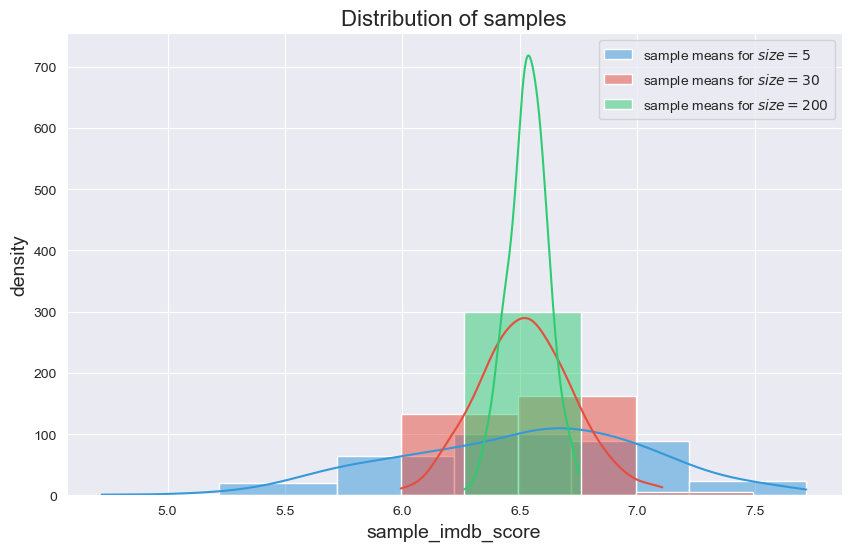

In [9]:
# Set figure
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Plot
sns.histplot(samplelist_5, label="sample means for $size=5$", kde=True,
             binwidth=0.5, alpha=0.5, color='#3498db', edgecolor='white')
sns.histplot(samplelist_30, label="sample means for $size=30$", kde=True,
             binwidth=0.5, alpha=0.5, color='#e74c3c', edgecolor='white')
sns.histplot(samplelist_200, label="sample means for $size=200$", kde=True,
             binwidth=0.5, alpha=0.5, color='#2ecc71', edgecolor='white')

# Set labels and title
plt.xlabel('sample_imdb_score', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.title('Distribution of samples', fontsize=16)
plt.legend()
plt.show()


## Conclusion

In this project, we verify the central limit theorem. Based on the above results, when the sample size increases we can see that the skewness of the curve decreases and the curve became sharper.

When the sample size is 200, the curve distribution is similar to a bell curve. Therefore according to Z-score theory, it can be used to represent the overall mean.